In [11]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
#Aktifkan Package
import pandas as pd
import numpy as np

In [2]:
#Input Data
dataset = pd.read_csv('data biml.csv',sep=",")
dataset.head()

,nama_kos,kecamatan,harga_sewa,k_kamar_mandi,WiFi,AC,akses_24_jam
0,Kost Sekar Kedaton Ngaglik Yogyakarta RMZ,Ngaglik,1350000,K. Mandi Dalam,WiFi,AC,Akses 24 Jam
1,Kost Apik Jasmine Tipe E UII Yogyakarta,Ngaglik,957000,K. Mandi Dalam,WiFi,Tidak AC,Tidak Akses 24 Jam
2,Kost D'Panda House Ngemplak Sleman,Ngemplak,1500000,K. Mandi Dalam,WiFi,AC,Akses 24 Jam
3,Kost ARIZKA Ngaglik Sleman,Ngaglik,1200000,K. Mandi Dalam,WiFi,AC,Akses 24 Jam
4,Kost Kazoku Ngaglik Sleman,Ngaglik,850000,K. Mandi Dalam,WiFi,AC,Akses 24 Jam


In [3]:
#Label encoder
from sklearn import preprocessing
category_col =['kecamatan', 'k_kamar_mandi',
'WiFi', 'AC', 'akses_24_jam']
labelEncoder = preprocessing.LabelEncoder()

#Daftar Kategorik
mapping_dict={}
for col in category_col:
    dataset[col] = labelEncoder.fit_transform(dataset[col])
    le_name_mapping = dict(zip(labelEncoder.classes_,
labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

{'kecamatan': {'Ngaglik': 0, 'Ngemplak': 1}, 'k_kamar_mandi': {'K. Mandi Dalam': 0, 'K. Mandi Luar': 1}, 'WiFi': {'Tidak Ada WiFi': 0, 'WiFi': 1}, 'AC': {'AC': 0, 'Tidak AC': 1}, 'akses_24_jam': {'Akses 24 Jam': 0, 'Tidak Akses 24 Jam': 1}}


In [4]:
#Variabel Independen
X = dataset.drop(["nama_kos","harga_sewa"], axis=1)
X.head()

,kecamatan,k_kamar_mandi,WiFi,AC,akses_24_jam
0,0,0,1,0,0
1,0,0,1,1,1
2,1,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [5]:
#Variabel Dependen
y=dataset["harga_sewa"]
y.head()

0    1350000
1     957000
2    1500000
3    1200000
4     850000
Name: harga_sewa, dtype: int64

In [6]:
#DataTesting dan Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=1234)

In [7]:
#Proporsi Data Testing dan Training
print(X_train.shape)
print(X_test.shape)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=7,
random_state=1234)

regressor.fit(X_test, y_test)
y_pred=regressor.predict(X_test)

(48, 5)
(12, 5)


In [8]:
#Nilai Koefiisien Determinasi Data Testing
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

0.5404589376733724

In [9]:
#Nilai Koefiisien Determinasi Data Training
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

0.5404589376733724

In [10]:
#Perhitungan Akurasi
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,
y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,
y_pred))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE :', np.mean(np.abs((y_test - y_pred) / y_test))*100)
print ('Nilai akurasi :', (1-(np.mean(np.abs((y_test - y_pred) /
y_test))))*100)

Mean Absolute Error: 55793.65079365079
Mean Squared Error: 6209252173.09146
Root Mean Squared Error: 78798.80819588238
MAPE : 7.4211104734564115
Nilai akurasi : 92.57888952654358


In [11]:
import matplotlib.pyplot as plt

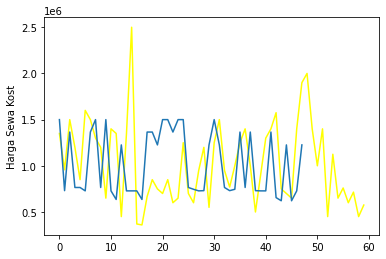

In [12]:
#Plot Perbandingan Nilai Aktual dan Prediksi
plt.plot(y, label="Data aktual",color="yellow")
plt.plot(y_pred2, label="Data prediksi")
plt.ylabel('Harga Sewa Kost')
plt.show()

         feature  importance
0      kecamatan    0.030548
1  k_kamar_mandi    0.017865
2           WiFi    0.000000
3             AC    0.924033
4   akses_24_jam    0.027555


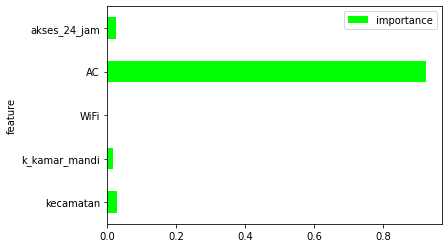

In [13]:
#Feature Importance
# Feature importances into a dataframe
features = list(X_train.columns)
feature_importances = pd.DataFrame({'feature': features,
'importance': regressor.feature_importances_})
feature_importances .plot(x ='feature', y='importance', kind =
'barh', color="lime")
print(feature_importances)

In [18]:
#Save Model
import pickle
pickle.dump(regressor, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1,0,1,0,0]]))

[1365357.14285714]


C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
print(model)

RandomForestRegressor(n_estimators=7, random_state=1234)
